<a href="https://colab.research.google.com/github/afif-af/hanson_ml_scikitlearn_tensorflow/blob/main/Chapter03handon_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)

In [2]:
x,y=mnist.data,mnist.target

In [3]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

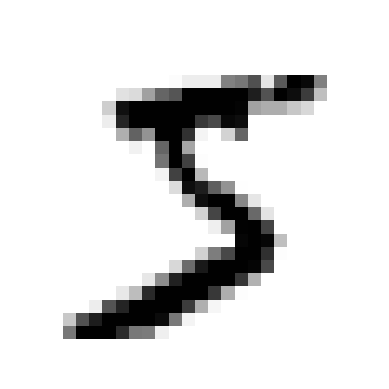

In [7]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit=x[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[0]

'5'

In [9]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [10]:
x_train.shape

(60000, 784)

In [11]:
x_test.shape

(10000, 784)

In [12]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [13]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [18]:
cross_val_score(dummy_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [19]:
from sklearn.model_selection import StratifiedKFold


In [20]:
from sklearn.base import clone

In [23]:
skfolds=StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(x_train, y_train_5):
  clone_clf = clone(sgd_clf)
  x_train_folds = x_train[train_index]
  y_train_folds = y_train_5[train_index]
  x_test_fold = x_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(x_train_folds, y_train_folds)
  y_pred = clone_clf.predict(x_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [28]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [35]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [36]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [37]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [42]:
threshold=0

In [44]:
y_some_digit_pred= (y_scores > threshold)
y_some_digit_pred

array([ True])

In [46]:
threshold=300
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [47]:
y_scores=cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

In [48]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

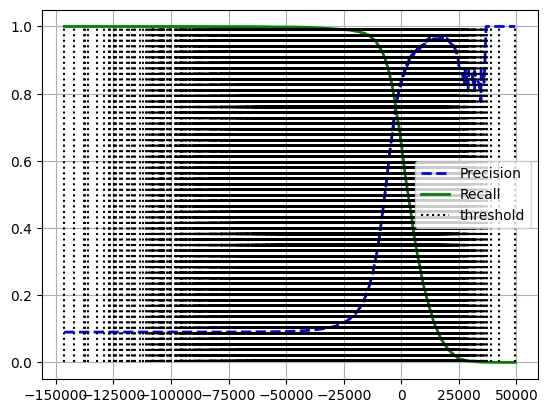

In [54]:
plt.plot(threshold, precisions[:-1],"b--",label="Precision",linewidth=2)
plt.plot(threshold, recalls[:-1],"g-",label="Recall",linewidth=2)
plt.vlines(threshold,0, 1.0,"k","dotted",label="threshold")
plt.grid()
plt.legend()

plt.show()

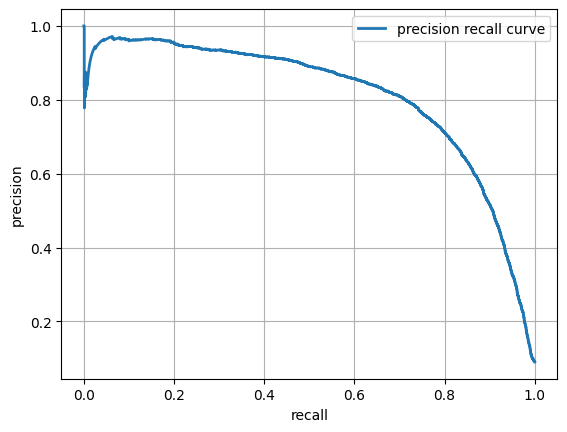

In [56]:
plt.plot(recalls,precisions,linewidth=2,label="precision recall curve")
plt.grid()
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()